## Evaluation Metrics for Classification
In this homework, we will use the Bank Marketing dataset.

### Dataset

In [1]:
import wget
import zipfile
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
file = wget.download(url)

with zipfile.ZipFile(file, "r") as zip_ref:
    zip_ref.extractall("bank_data")  # Extract everything to bank_data folder

inner_zip_path = os.path.join("bank_data", "bank.zip")

with zipfile.ZipFile(inner_zip_path, "r") as zip_ref:
    zip_ref.extract("bank-full.csv", "bank_data")  # Extract bank-full.csv to bank_data

# Step 5: Confirm extraction and show the path
extracted_file_path = os.path.join("bank_data", "bank-full.csv")
if os.path.exists(extracted_file_path):
    print(f"\nSuccessfully extracted {extracted_file_path}")
else:
    print("File extraction failed.")

data = pd.read_csv(extracted_file_path, sep=';')
data.head(n=20)

-1 / unknown
Successfully extracted bank_data\bank-full.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
data.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Dataset preparation
- age
- job
- marital
- education
- balance
- housing
- contact
- day
- month
- duration
- campaign
- pdays
- previous
-poutcome
- y
outcome',
'y'

In [5]:
variables = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

data = data[variables]
data.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.y = (data.y == 'yes').astype(int)
data.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


### Split data

In [9]:
from sklearn.model_selection import train_test_split

# Perform the split for train/val/test
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

assert len(data) == (len(df_train) + len(df_val) + len(df_test))

In [49]:
len(df_train_full), len(df_train), len(df_val), len(df_test)

(36168, 28935, 7233, 9043)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [17]:
from collections import Counter
Counter(y_train)

Counter({0: 23985, 1: 3141})

### Question 1. ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the y variable
Use the training dataset for that
If your **AUC is < 0.5** , invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [19]:
from sklearn.metrics import roc_auc_score

# Initialisation the array to store the AUCs
auc_scores = {}

# For each numerical variable, consider it as a 'score(prediction)' and find the AUC with the target
for column in df_train.select_dtypes(include=['int64']).columns:
    if column != 'y':
        score = df_train[column]
        auc = roc_auc_score(y_train, score)
        auc_scores[column] = auc

        # If the variable is less than 0.5, it would mean it is negatively correlated with 'y'
        if auc < 0.5:
            df_train[column] = -df_train[column]
            print(f"Invert {column}: AUC= {auc:.2f} -> AUC after inversion = {roc_auc_score(y_train, df_train[column]): .2f}")

        # If the variable is above 0.5, prnt the column and its AUC score
        else: 
            print(f"{column}: AUC= {auc:.2f}")

Invert age: AUC= 0.49 -> AUC after inversion =  0.51
balance: AUC= 0.59
Invert day: AUC= 0.47 -> AUC after inversion =  0.53
duration: AUC= 0.81
Invert campaign: AUC= 0.43 -> AUC after inversion =  0.57
pdays: AUC= 0.59
previous: AUC= 0.60


In [20]:
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

assert 'y' not in df_train.columns
assert 'y' not in df_val.columns
assert 'y' not in df_test.columns

> `duration` is the feaure with the highest AUC, and we do not have any numerical variable negatively correlated with `y`.

### Q2. Train the logistic regression model

In [21]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

# Initialize the encoder
dv = DictVectorizer(sparse=False)

# Encode the training set
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Encode the validation set
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

# train the model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

# Find the prediction on validation
y_val_pred = model.predict_proba(X_val)[:, 1]

# Find the AUC
round(roc_auc_score(y_val, y_val_pred), 3)

0.892

### Q3. Calculate the precision and recall

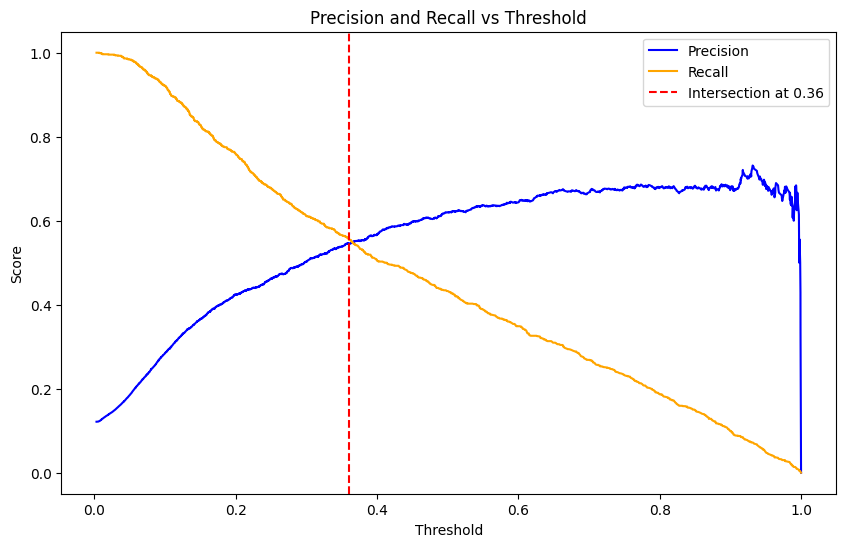

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

thresholds = np.linspace(0, 1, 101)

precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred)

# Plotting precision and recall
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
plt.axvline(x=intersection_threshold, color='red', linestyle='--', label=f'Intersection at {intersection_threshold:.2f}')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
#plt.grid()
plt.show()

In [24]:
# Finding the intersection point
# To find the intersection, calculate the absolute difference between precision and recall
intersection_index = np.argwhere(np.isclose(precision[:-1], recall[:-1], atol=0.01)).flatten()

if intersection_index.size > 0:
    intersection_threshold = thresholds[intersection_index[0]]
    intersection_threshold = round(intersection_threshold, 3)
    print(f"The precision and recall curves intersect at a threshold of: {intersection_threshold}")
else:
    print("No intersection point found within the given precision and recall curves.")

The precision and recall curves intersect at a threshold of: 0.36


### Q4. F1 score

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

In [26]:
# Calculate F1 scores
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = np.nan_to_num(f1_scores)


# Find the threshold that gives the maximum F1 score
max_f1_index = np.argmax(f1_scores)
max_f1_threshold = thresholds[max_f1_index]
max_f1_value = f1_scores[max_f1_index]

print(f"The maximum F1 score is {max_f1_value:.2f} at a threshold of {max_f1_threshold:.2f}.")

The maximum F1 score is 0.56 at a threshold of 0.32.


C:\Users\LATITUDE 5520\AppData\Local\Temp\ipykernel_9932\1582657572.py:2: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


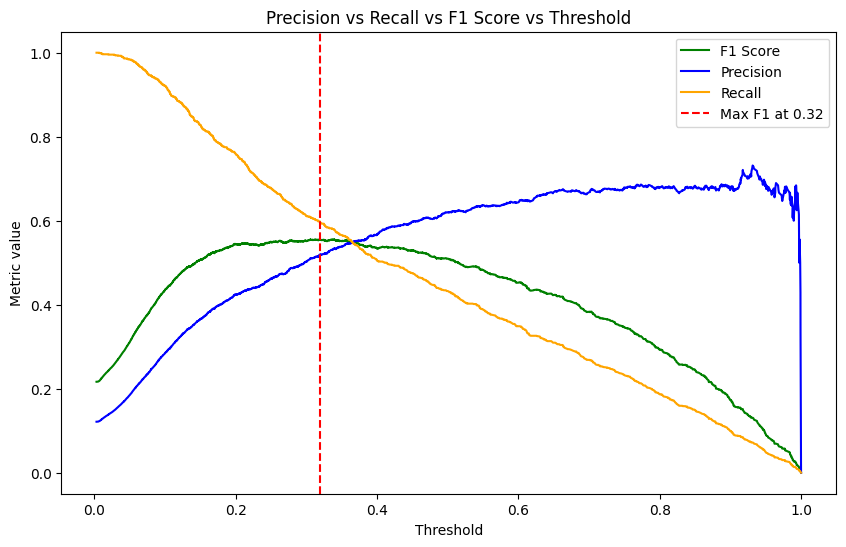

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='green')
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
plt.axvline(x=max_f1_threshold, color='red', linestyle='--', label=f'Max F1 at {max_f1_threshold:.2f}')
plt.title('Precision vs Recall vs F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Metric value')
plt.legend()
plt.show()

In [52]:
def train(df, y):
    df = df.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(df)
    X = dv.transform(df)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model

def predict(df, dv, model):
    df = df.to_dict(orient='records')

    X = dv.transform(df)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

### Q5. 5-fold validation

In [53]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [57]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_train = df_train.drop(columns='y')  
    y_train = df_train_full.y.iloc[train_idx].values  
    
    df_val = df_train_full.iloc[val_idx]
    df_val = df_val.drop(columns='y')  
    y_val = df_train_full.y.iloc[val_idx].values  
    
    # Train the model
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

# Optional: Print AUC scores
print("AUC Scores for each fold:", aucs)

AUC Scores for each fold: [0.8993883806356288, 0.8989055268937651, 0.9112102229960733, 0.9080952264469403, 0.9100912737695956]


In [58]:
np.array(aucs).round(3)

array([0.899, 0.899, 0.911, 0.908, 0.91 ])

In [59]:
print('auc %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc 0.906 ± 0.005


### Q6. Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [60]:
# We re-define the train function
def train(df, y, C=10.0):
    df = df.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(df)
    X = dv.transform(df)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model

In [62]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

results = {}

for C in [0.000001, 0.001, 1]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_train = df_train.drop(columns='y')  
        y_train = df_train_full.y.iloc[train_idx].values  
        
        df_val = df_train_full.iloc[val_idx]
        df_val = df_val.drop(columns='y')  
        y_val = df_train_full.y.iloc[val_idx].values  
        
        # Train the model
        dv, model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)
    
        rocauc = roc_auc_score(y_val, y_pred)
        aucs.append(rocauc)

    mean_auc = round(np.mean(aucs), 3)
    std_auc = round(np.std(aucs), 3)
    
    results[C] = (mean_auc, std_auc)

for C, (mean_auc, std_auc) in results.items():
    print(f"C: {C}, Mean AUC: {mean_auc}, Std Dev AUC: {std_auc}")

    
    #print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C: 1e-06, Mean AUC: 0.906, Std Dev AUC: 0.005
C: 0.001, Mean AUC: 0.906, Std Dev AUC: 0.005
C: 1, Mean AUC: 0.906, Std Dev AUC: 0.005


> As smaller C implies high regularization, we will choose 1 for the low regularization.